In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Solution to ODE Initial Value Problems

Many physical, biological, and societal systems can be written as a system of ordinary differential equations (ODEs).  In the case where the initial state (value) is know the problems can be written as

$$\frac{\text{d} \vec{u}}{\text{d}t} = \vec{f}(t, \vec{u}) ~~~~ \vec{u}(0) = \vec{u}_0$$

where
 - $\vec{u}(t)$ is the state vector
 - $\vec{f}(t, \vec{u})$ is a vector-valued function that controls the growth of $\vec{u}$ with time
 - $\vec{u}(0)$ is the initial condition at time $t = 0$

#### Examples:  Simple radioactive decay
$\vec{u} = [c]$
   
$$\frac{\text{d} c}{\text{d}t} = -\lambda c ~~~~ c(0) = c_0$$
   

which has solutions of the form $c(t) = c_0 e^{-\lambda t}$

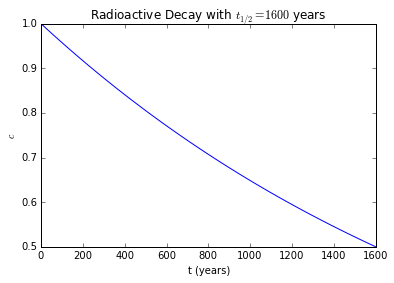

In [2]:
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, 1.0 * numpy.exp(-decay_constant * t))

axes.set_title("Radioactive Decay with $t_{1/2} = 1600$ years")
axes.set_xlabel('t (years)')
axes.set_ylabel('$c$')
axes.set_ylim((0.5,1.0))
plt.show()

#### Examples:  Complex radioactive decay (or chemical system).

Chain of decays from one species to another.

$$\begin{aligned}
    \frac{\text{d} c_1}{\text{d}t} &= -\lambda_1 c_1 \\
    \frac{\text{d} c_2}{\text{d}t} &= \lambda_1 c_1 - \lambda_2 c_2 \\
    \frac{\text{d} c_2}{\text{d}t} &= \lambda_2 c_3 - \lambda_3 c_3 
\end{aligned}$$

$$\frac{\text{d} \vec{u}}{\text{d}t} = \frac{\text{d}}{\text{d}t}\begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix} = 
\begin{bmatrix} 
    -\lambda_1 & 0 & 0 \\
    \lambda_1 & -\lambda_2 & 0 \\
    0 & \lambda_2 & -\lambda_3
\end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}$$

$$\frac{\text{d} \vec{u}}{\text{d}t} = A \vec{u}$$

For systems of equations like this the general solution to the ODE is the matrix exponential:

$$\vec{u}(t) = \vec{u}_0 e^{A t}$$

#### Examples: Van der Pol Oscillator

$$y'' - \mu (1 - y^2) y' + y = 0~~~~~\text{with}~~~~ y(0) = y_0, ~~~y'(0) = v_0$$
 
$$\vec{u} = \begin{bmatrix} y \\ y' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix}$$
   
$$\frac{\text{d}}{\text{d}t} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} u_2 \\ \mu (1 - u_1^2) u_2 - u_1 \end{bmatrix} = \vec{f}(t, \vec{u})$$

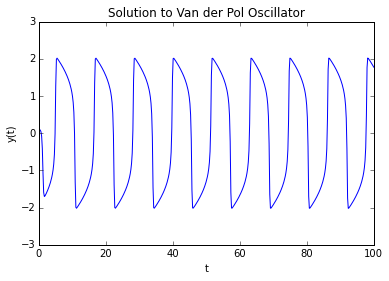

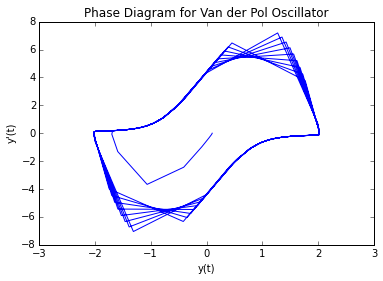

In [3]:
import scipy.integrate as integrate

def f(t, u, mu=5):
    return numpy.array([u[1], mu * (1.0 - u[0]**2) * u[1] - u[0]])

t = numpy.linspace(0.0, 100, 500)
u = numpy.empty((2, 500))
u[:, 0] = [0.1, 0.0]

integrator = integrate.ode(f)
integrator.set_integrator("dopri5")
integrator.set_initial_value(u[:, 0])

for (n, t_n) in enumerate(t[1:]):
    integrator.integrate(t_n)
    if not integrator.successful():
        break
    u[:, n + 1] = integrator.y
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, u[0,:])
axes.set_title("Solution to Van der Pol Oscillator")
axes.set_xlabel("t")
axes.set_ylabel("y(t)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(u[0,:], u[1, :])
axes.set_title("Phase Diagram for Van der Pol Oscillator")
axes.set_xlabel("y(t)")
axes.set_ylabel("y'(t)")

plt.show()

#### Examples:  Particle tracking in a fluid

$$\frac{\text{d} \vec{X}}{\text{d}t} = \vec{V}(t, \vec{X})$$

In fact all ODE IVP systems can be thought of as tracking particles through a flow field (dynamical system).  In 1-dimension the flow "manifold" we are on is fixed by the initial condition.

## Basic Stepping Schemes

Looking back at our work on numerical differentiation why not approximate the derivative as a finite difference:

$\frac{u(t + \Delta t) - u(t)}{\Delta t} = f(t, u)$

We still need to decide how to evaluate the $f(t, u)$ term however.  Lets look at this from a perspective of quadrature, take the intergral of both sides:

$\begin{aligned}\int^{t + \Delta t}_t \frac{\text{d} u}{\text{d}\tilde{t}} d\tilde{t} &= \int^{t + \Delta t}_t f(t, u) d\tilde{t} \\
u(t + \Delta t) - u(t) &= \Delta t f(t, u(t))
\frac{u(t + \Delta t) - u(t)}{\Delta t} &= f(t, u(t))
\end{aligned}$

where we have used a left-sided quadrature rule for the integral on the right.  Introducing some notation to simpify things

$t_0 = 0$

$t_1 = t_0 + \Delta t$

$t_n = t_{n-1} + \Delta t = n \Delta t + t_0$

$u_0 = u(t_0)$

$u_1 = u(t_1)$

$u_n = u(t_n)$

we can rewrite our scheme as

$\frac{u_{n+1} - u_n}{\Delta t} = f(t_n, u_n)$

or

$u_{n+1} = u_n + \Delta t f(t_n, u_n)$

which is known as the *forward Euler method*.  In essence we are approximating the derivative with the value of the function at the point we are at $t_n$.

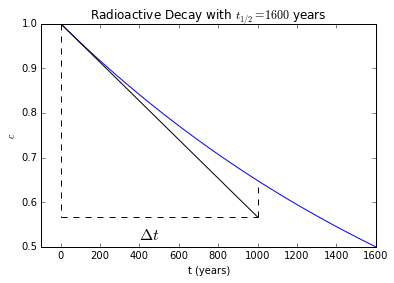

In [4]:
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, c_0 * numpy.exp(-decay_constant * t), label="True Solution")

# Plot Euler step
dt = 1e3
u_np = c_0 + dt * (-decay_constant * c_0)
axes.plot((0.0, dt), (c_0, u_np), 'k')
axes.plot((dt, dt), (u_np, c_0 * numpy.exp(-decay_constant * dt)), 'k--')
axes.plot((0.0, 0.0), (c_0, u_np), 'k--')
axes.plot((0.0, dt), (u_np, u_np), 'k--')
axes.text(400, u_np - 0.05, '$\Delta t$', fontsize=16)

axes.set_title("Radioactive Decay with $t_{1/2} = 1600$ years")
axes.set_xlabel('t (years)')
axes.set_ylabel('$c$')
axes.set_xlim(-1e2, 1.6e3)
axes.set_ylim((0.5,1.0))
plt.show()

A similar method can be derived if we consider instead using the second order accurate central difference:

$$\frac{u_{n+1} - u_{n-1}}{2\Delta t} = f(t_{n}, u_{n})$$

this method is known as the leap-frog method.  Note that the way we have written this method requires a previous function evaluation and technically is a "multi-step" method although we do not actually use the current evaluation.

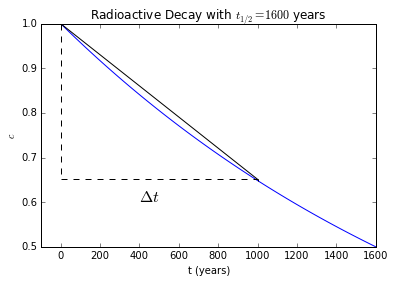

In [5]:
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, c_0 * numpy.exp(-decay_constant * t), label="True Solution")

# Plot Euler step
dt = 1e3
u_np = c_0 + dt * (-decay_constant * c_0 * numpy.exp(-decay_constant * dt / 2.0))
axes.plot((0.0, dt), (c_0, u_np), 'k')
axes.plot((dt, dt), (u_np, c_0 * numpy.exp(-decay_constant * dt)), 'k--')
axes.plot((0.0, 0.0), (c_0, u_np), 'k--')
axes.plot((0.0, dt), (u_np, u_np), 'k--')
axes.text(400, u_np - 0.05, '$\Delta t$', fontsize=16)

axes.set_title("Radioactive Decay with $t_{1/2} = 1600$ years")
axes.set_xlabel('t (years)')
axes.set_ylabel('$c$')
axes.set_xlim(-1e2, 1.6e3)
axes.set_ylim((0.5,1.0))
plt.show()

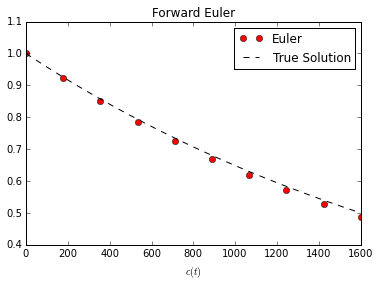

In [6]:
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda t, u: -decay_constant * u

t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

# Implement Euler
t_euler = numpy.linspace(0.0, 1.6e3, 10)
delta_t = t_euler[1] - t_euler[0]
u_euler = numpy.empty(t_euler.shape)
u_euler[0] = c_0
for (n, t_n) in enumerate(t_euler[:-1]):
    u_euler[n + 1] = u_euler[n] + delta_t * f(t_n, u_euler[n])

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_euler, u_euler, 'or', label="Euler")
axes.plot(t_exact, u_exact, 'k--', label="True Solution")

axes.set_title("Forward Euler")
axes.set_xlabel("t (years)")
axes.set_xlabel("$c(t)$")
axes.set_ylim((0.4,1.1))
axes.legend()
plt.show()

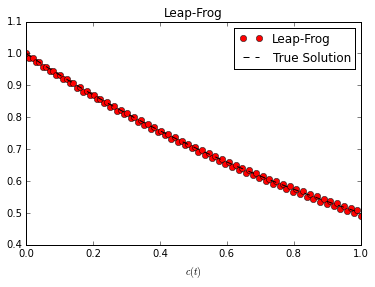

In [7]:
c_0 = 1.0
# decay_constant = numpy.log(2.0) / 1600.0
decay_constant = numpy.log(2.0)
f = lambda t, u: -decay_constant * u

# t_exact = numpy.linspace(0.0, 1.6e3, 100)
t_exact = numpy.linspace(0.0, 1.0, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

# Implement leap-frog
# t_leapfrog = numpy.linspace(0.0, 1.6e3, 10)
t_leapfrog = numpy.linspace(0.0, 1.0, 100)
delta_t = t_leapfrog[1] - t_leapfrog[0]
u_leapfrog = numpy.empty(t_leapfrog.shape)
u_leapfrog[0] = c_0
# First evaluation use Euler to get us going
u_leapfrog[1] = u_leapfrog[0] + delta_t * f(t_leapfrog[0], u_leapfrog[0])
for (n, t_n) in enumerate(t_leapfrog[1:]):
    u_leapfrog[n + 1] = u_leapfrog[n - 1] + 2.0 * delta_t * f(t_n, u_leapfrog[n])

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_leapfrog, u_leapfrog, 'or', label="Leap-Frog")
axes.plot(t_exact, u_exact, 'k--', label="True Solution")

axes.set_title("Leap-Frog")
axes.set_xlabel("t (years)")
axes.set_xlabel("$c(t)$")
axes.set_ylim((0.4,1.1))
axes.legend()
plt.show()

## Error Analysis of ODE Methods

At this point it is also helpful to introduce more notation to distinguish between the true solution to the ODE $u(t_n)$ and the approximated value which we will denote $U_n$.

**Definition:** We define the *truncation error* of a scheme by

$$T(t, u; \Delta t) = \frac{1}{\Delta t} [U_{n+1} - u(t + \Delta t)]$$

**Definition:** A method is called *consistent* if $\lim_{\Delta t \rightarrow 0} T(t, u; \Delta t) = 0$.

**Definition:** We say that a method is *order* $p$ accurate if

$$||T(t, u; \Delta t) || \leq C \Delta t^p$$

uniformally on $t \in [0, T]$.  This can also be written as $T(t, u; \Delta t) = \mathcal{O}(\Delta t^p)$.  Note that a method is consistent if $p > 0$.

### Error Analysis of Forward Euler

We can analyze the error and convergence order of forward Euler by considering the Taylor series centered at $t_n$:

$u(t) = u(t_n) + (t - t_n) u'(t_n) + \frac{u''(t_n)}{2} (t - t_n)^2 + \mathcal{O}((t-t_n)^3)$

Evaluating this series at $t_{n+1}$ gives

$\begin{aligned}
u(t_{n+1}) &= u(t_n) + (t_{n+1} - t_n) u'(t_n) + \frac{u''(t_n)}{2} (t_{n+1} - t_n)^2 + \mathcal{O}((t_{n+1}-t_n)^3)\\
&=u_n + \Delta t f(t_n, u_n) + \frac{u''(t_n)}{2} \Delta t^2 + \mathcal{O}(\Delta t^3)
\end{aligned}$

From the definition of truncation error we can use our Taylor series expression and find the truncation error to be

$\begin{aligned}
T(t, u; \Delta t) &= \frac{1}{\Delta t} [U_{n+1} - u(t + \Delta t)] \\
&= \frac{1}{\Delta t} \left[ u_n + \Delta t f(t_n, u_n) - \left( u_n + \Delta t f(t_n, u_n) + \frac{u''(t_n)}{2} \Delta t^2 + \mathcal{O}(\Delta t^3) \right )\right ] \\
&= \frac{1}{\Delta t} \left[ - \frac{u''(t_n)}{2} \Delta t^2 - \mathcal{O}(\Delta t^3) \right ] \\
&= - \frac{u''(t_n)}{2} \Delta t - \mathcal{O}(\Delta t^2)
\end{aligned}$

This implies that forwar Euler is first order accurate and therefore consistent.

### Error Analysis of Leap-Frog Method

To easily analyze this method we will expand the Taylor series from before to another order and evaluate at both the needed positions:

$u(t) = u(t_n) + (t - t_n) u'(t_n) + (t - t_n)^2 \frac{u''(t_n)}{2}  + (t - t_n)^3 \frac{u'''(t_n)}{6} + \mathcal{O}((t-t_n)^4)$

leading to 

$\begin{aligned}
u(t_{n+1}) &= u_n + \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  + \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4)\\
u(t_{n-1}) &= u_n - \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  - \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4)
\end{aligned}$

Plugging this into our definition of the truncation error along with the leap-frog method definition leads to

$\begin{aligned}
T(t, u; \Delta t) &=\frac{1}{\Delta t} \left [\left(u_n - \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  - \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4)\right) + 2\Delta t f_n - \left(u_n + \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  + \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4) \right )\right ] \\
&=\frac{1}{\Delta t} \left [- \Delta t^3 \frac{u'''(t_n)}{3} + \mathcal{O}(\Delta t^4) \right ] \\
&=- \Delta t^2 \frac{u'''(t_n)}{3} + \mathcal{O}(\Delta t^3)
\end{aligned}$

Therefore the method is second order accurate and is consistent theoretically.  In practice it's a bit more complicated than that.


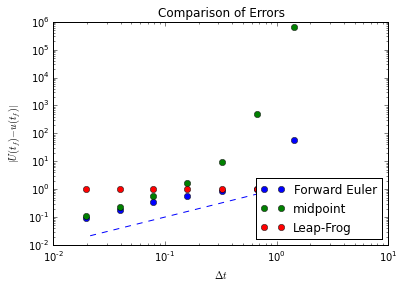

In [8]:
# Compare accuracy between Euler and Leap-Frog
f = lambda t, u: -u
u_exact = lambda t: numpy.exp(-t)

t_f = 10.0
num_steps = [2**n for n in xrange(3,10)]
delta_t = numpy.empty(len(num_steps))
error_euler = numpy.empty(len(num_steps))
error_midpoint = numpy.empty(len(num_steps))
error_leapfrog = numpy.empty(len(num_steps))

for (i, N) in enumerate(num_steps):
    t = numpy.linspace(0, t_f, N)
    delta_t[i] = t[1] - t[0]
    
    # Compute Euler solution
    u_euler = numpy.empty(t.shape)
    u_euler[0] = 1.0
    for (n, t_n) in enumerate(t[1:]):
        u_euler[n+1] = u_euler[n] + delta_t[i] * f(t_n, u_euler[n])
        
    # Compute midpoint
    u_midpoint = numpy.empty(t.shape)
    u_midpoint[0] = 1.0
    for (n, t_n) in enumerate(t[1:]):
        u_midpoint[n+1] = u_midpoint[n] + delta_t[i] * f(t_n + 0.5 * delta_t[i], 
                                                         u_midpoint[n] + delta_t[i] * f(t_n, u_midpoint[n]))
        
    # Compute Leap-Frog
    u_leapfrog = numpy.empty(t.shape)
    u_leapfrog[0] = 1.0
    u_leapfrog[1] = u_euler[1]
    for (n, t_n) in enumerate(t[2:]):
        u_leapfrog[n+1] = u_leapfrog[n-1] + 2.0 * delta_t[i] * f(t_n, u_leapfrog[n])
        
    # Compute error for each
    error_euler[i] = numpy.abs(u_euler[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    error_midpoint[i] = numpy.abs(u_midpoint[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    error_leapfrog[i] = numpy.abs(u_leapfrog[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    
# Plot error vs. delta_t
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_t, error_euler, 'bo', label='Forward Euler')
axes.loglog(delta_t, error_midpoint, 'go', label='midpoint')
axes.loglog(delta_t, error_leapfrog, 'ro', label="Leap-Frog")

axes.loglog(delta_t, delta_t**(1.0), '--b')

axes.legend(loc=4)
axes.set_title("Comparison of Errors")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

plt.show()

## Runge-Kutta Methods

One way to derive higher-order ODE solvers is by computing intermediate stages.  These are not *multi-step* methods as they still only require information from the current time step but they raise the order of accuracy by adding *stages*.  These types of methods are called **Runge-Kutta** methods.

### Example:  Two-stage Runge-Kutta Methods

The basic idea behind the simplest of the Runge-Kutta methods is to approximate the solution at $t_n + \Delta t / 2$ via Euler's method and use this in the function evaluation for the final update.

$U^* = U^n + \frac{1}{2} \Delta t f(U^n)$

$U^{n+1} = U^n + \Delta t f(U^*) = U^n + \Delta t f(U^n + \frac{1}{2} \Delta t f(U^n))$

The truncation error can be computed similarly to how we did so before but we do need to figure out how to compute the derivative inside of the function.  Note that due to $f(u(t_n)) = u'(t_n)$ that differentiating this leads to $f'(u(t_n)) u'(t_n) = u''(t_n)$ leading to

$\begin{aligned}
    f\left(u(t_n) + \frac{1}{2} \Delta t f(u(t_n)) \right ) = f\left(u(t_n) +\frac{1}{2} \Delta t u'(t_n) \right ) \\
    &= f(u(t_n)) + \frac{1}{2} \Delta t u'(t_n) f'(u(t_n)) + \frac{1}{8} \Delta t^2 (u'(t_n))^2 f''(u(t_n)) + \mathcal{O}(\Delta t^3) \\
    &=u'(t_n) + \frac{1}{2} \Delta t u''(t_n) + \mathcal{O}(\Delta t^2)
\end{aligned}$

Going back to the truncation error we have

$\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t} \left[u_n + \Delta t f\left(u_n + \frac{1}{2} \Delta t f(u_n)\right) - \left(u_n + \Delta t f(t_n, u_n) + \frac{u''(t_n)}{2} \Delta t^2 + \mathcal{O}(\Delta t^3) \right ) \right] \\
    &=\frac{1}{\Delta t} \left[\Delta t u'(t_n) + \frac{1}{2} \Delta t^2 u''(t_n) + \mathcal{O}(\Delta t^3) - \Delta t u'(t_n) - \frac{u''(t_n)}{2} \Delta t^2 + \mathcal{O}(\Delta t^3) \right] 
    &= \mathcal{O}(\Delta t^2)
\end{aligned}$

so this method is second order accurate.

### Example:  4-stage Runge-Kutta Method

$\begin{aligned}
    Y_1 &= U_n \\
    Y_2 &= U_n + \frac{1}{2} \Delta t f(Y_1, t_n) \\
    Y_3 &= U_n + \frac{1}{2} \Delta t f(Y_2, t_n + \Delta t / 2) \\
    Y_4 &= U_n + \Delta t f(Y_3, t_n + \Delta t / 2) \\
    U_{n+1} &= U_n + \frac{\Delta t}{6} \left [f(Y_1, t_n) + 2 f(Y_2, t_n + \Delta t / 2) + 2 f(Y_3, t_n + \Delta t/2) + f(Y_4, t_n + \Delta t) \right ]
\end{aligned}$

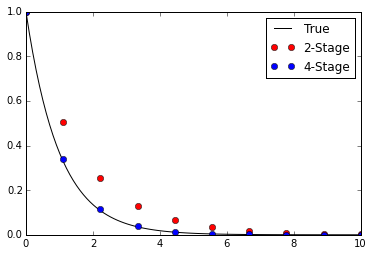

In [9]:
# Implement and compare the two-stage and 4-stage Runge-Kutta methods
f = lambda t, u: -u

t_exact = numpy.linspace(0.0, 10.0, 100)
u_exact = numpy.exp(-t_exact)

N = 10
t = numpy.linspace(0, 10.0, N)
delta_t = t[1] - t[0]
u_2 = numpy.empty(t.shape)
u_4 = numpy.empty(t.shape)
u_2[0] = 1.0
u_4[0] = 1.0

for (n, t_n) in enumerate(t[1:]):
    u_2[n+1] = u_2[n] + 0.5 * delta_t * f(t_n, u_2[n])
    u_2[n+1] = u_2[n] + delta_t * f(t_n, u_2[n+1])
    y_1 = u_4[n]
    y_2 = u_4[n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_1)
    y_3 = u_4[n] + 0.5 * delta_t * f(t_n + 0.5, y_2)
    y_4 = u_4[n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
    u_4[n+1] = u_4[n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t_exact, u_exact, 'k', label="True")
axes.plot(t, u_2, 'ro', label="2-Stage")
axes.plot(t, u_4, 'bo', label="4-Stage")
axes.legend(loc=1)

plt.show()

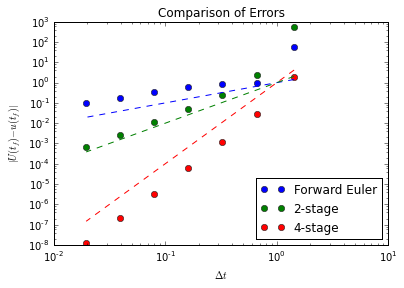

In [10]:
# Compare accuracy between Euler and Leap-Frog
f = lambda t, u: -u
u_exact = lambda t: numpy.exp(-t)

t_f = 10.0
num_steps = [2**n for n in xrange(3,10)]
delta_t = numpy.empty(len(num_steps))
error_euler = numpy.empty(len(num_steps))
error_2 = numpy.empty(len(num_steps))
error_4 = numpy.empty(len(num_steps))

for (i, N) in enumerate(num_steps):
    t = numpy.linspace(0, t_f, N)
    delta_t[i] = t[1] - t[0]
    
    # Compute Euler solution
    u_euler = numpy.empty(t.shape)
    u_euler[0] = 1.0
    for (n, t_n) in enumerate(t[1:]):
        u_euler[n+1] = u_euler[n] + delta_t[i] * f(t_n, u_euler[n])
        
    # Compute 2 and 4-stage
    u_2 = numpy.empty(t.shape)
    u_4 = numpy.empty(t.shape)
    u_2[0] = 1.0
    u_4[0] = 1.0
    for (n, t_n) in enumerate(t[1:]):
        u_2[n+1] = u_2[n] + 0.5 * delta_t[i] * f(t_n, u_2[n])
        u_2[n+1] = u_2[n] + delta_t[i] * f(t_n, u_2[n+1])
        y_1 = u_4[n]
        y_2 = u_4[n] + 0.5 * delta_t[i] * f(t_n + 0.5 * delta_t[i], y_1)
        y_3 = u_4[n] + 0.5 * delta_t[i] * f(t_n + 0.5, y_2)
        y_4 = u_4[n] + delta_t[i] * f(t_n + 0.5 * delta_t[i], y_3)
        u_4[n+1] = u_4[n] + delta_t[i] / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t[i], y_2) + 2.0 * f(t_n + 0.5 * delta_t[i], y_3) + f(t_n + delta_t[i], y_4))
        
    # Compute error for each
    error_euler[i] = numpy.abs(u_euler[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    error_2[i] = numpy.abs(u_2[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    error_4[i] = numpy.abs(u_4[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    
# Plot error vs. delta_t
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_t, error_euler, 'bo', label='Forward Euler')
axes.loglog(delta_t, error_2, 'go', label='2-stage')
axes.loglog(delta_t, error_4, 'ro', label="4-stage")

axes.loglog(delta_t, delta_t**(1.0), '--b')
axes.loglog(delta_t, delta_t**(2.0), '--g')
axes.loglog(delta_t, delta_t**(4.0), '--r')

axes.legend(loc=4)
axes.set_title("Comparison of Errors")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

plt.show()

## Linear Multi-Step Methods

Multi-step methods (as introduced via the leap-frog method) are ODE methods that require multiple time step evaluations to work.  Some of the advanatages of using a multi-step method rather than one-step method included

 - Taylor series methods require differentiating the given equation which can be cumbersome and difficult to impelent
 - One-step methods at higher order often require the evaluation of the function $f$ many times
 
Disadvantages

 - Methods are not self-starting, i.e. they require other methods to find the initial values
 - The time step $\Delta t$ in one-step methods can be changed at any time while multi-step methods this is much more complex
 
### General Linear Multi-Step Methods

All linear multi-step methods can be written as the linear combination of past, present and future solutions:

$\sum^r_{j=0} \alpha_j U_{n+j} = \Delta t \sum^r_{j=0} \beta_j f(U_{n+j}, t_{n+j})$

If $\beta_r = 0$ then the method is explicit (only requires previous time steps).  Note that the coefficients are not unique as we can multiply both sides by a constant.  In practice a normalization of $\alpha_r = 1$ is used.

#### Example: Adams Methods

$U_{n+r} = U_{n+r-1} + \Delta t \sum^r_{j=0} \beta_j f(U_{n+j}).$

All these methods have $\alpha_r = 1$, $\alpha_{r-1} = -1$ and $\alpha_j=0$ for $j < r - 1$.

### Adams-Bashforth Methods
The **Adams-Bashforth** methods are explicit solvers that maximize the order of accuracy given a number of steps $r$.  This is accomplished by looking at the Taylor series and picking the coefficients $\beta_j$ to elliminate as many terms in the Taylor series as possible.

 - 1-step: $U_{n+1} = U_n +\Delta t / 2 (f(U_n) + f(U_{n+1}))$
 - 2-step: $U_{n+2} = U_{n+1} + \Delta t / 2 (-f(U_n) + 3 f(U_{n+1}))
 - 3-step: $U_{n+3} = U_{n+2} + \Delta t / 12 (5 f(U_n) - 16 f(U_{n+1}) + 23 f(U_{n+2}))
 

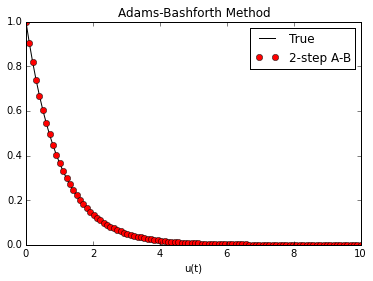

In [11]:
# Use 2-step Adams-Bashforth to compute solution
f = lambda t, u: -u

t_exact = numpy.linspace(0.0, 10.0, 100)
u_exact = numpy.exp(-t_exact)

N = 100
t = numpy.linspace(0, 10.0, N)
delta_t = t[1] - t[0]
u_ab2 = numpy.empty(t.shape)

# Use RK-2 to start the method
u_ab2[0] = 1.0
u_ab2[1] = u_ab2[0] + 0.5 * delta_t * f(t[0], u_ab2[0])
u_ab2[1] = u_ab2[0] + delta_t * f(t[0], u_ab2[1])
for n in xrange(0,len(t)-2):
    u_ab2[n+2] = u_ab2[n + 1] + delta_t / 2.0 * (-f(t[n], u_ab2[n]) + 3.0 * f(t[n+1], u_ab2[n+1]))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t_exact, u_exact, 'k', label="True")
axes.plot(t, u_ab2, 'ro', label="2-step A-B")

axes.set_title("Adams-Bashforth Method")
axes.set_xlabel("t")
axes.set_xlabel("u(t)")
axes.legend(loc=1)

plt.show()

### Adams-Moulton Methods
The **Adams-Moulton** methods are the implicit versions of the Adams-Bashforth methods.  Since this gives one additional parameter to use $\beta_r$ these methods are generally one order of accuracy greater than their counterparts.

 - 1-step: $U_{n+1} = U_n + \Delta t / 2(f(U_n) + f(U_{n+1}))$
 - 2-step: $U_{n+2} = U_{n+1} + \Delta t / 12 (-f(U_n) + 8f(U_{n+1}) + 5f(U_{n+2})$
 - 3-step: $U_{n+3} = U_{n+2} + \Delta t / 24 (f(U_n) - 5f(U_{n+1}) + 19f(U_{n+2}) + 9f(U_{n+3})$
 
### Truncation Error for Multi-Step Methods

We can again find the truncation error in general for linear multi-step methods:

$\begin{aligned}
T(t, u; \Delta t) &= \frac{1}{\Delta t} \left [\sum^r_{j=0} \alpha_j u_{n+j} - \Delta t \sum^r_{j=0} \beta_j f(u_{n+j}, t_{n+j}) \right ]
\end{aligned}$

Using the general expansion and evalution of the Taylor series about $t_n$ we have

$\begin{aligned}
    u(t_{n+j}) &= u(t_n) + j \Delta t u'(t_n) + \frac{1}{2} (j k)^2 u''(t_n) + \mathcal{O}(\Delta t^3) \\
    u'(t_{n+j}) &= u'(t_n) + j \Delta t u''(t_n) + \frac{1}{2} (j k)^2 u'''(t_n) + \mathcal{O}(\Delta t^3)
\end{aligned}$

leading to

$\begin{aligned}
T(t, u; \Delta t) &= \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u_{n+j} + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) \\
&~~~~~~~+ \cdots + \Delta t^{q - 1} \left (\frac{1}{q!} \left(j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j \right) \right) u^{(q)}(t_n) + \cdots
\end{aligned}$

The method is *consistent* if the first two terms of the expansion vanish, i.e. $\sum^r_{j=0} \alpha_j = 0$ and $\sum^r_{j=0} j \alpha_j = \sum^r_{j=0} \beta_j$.

### Predictor-Corrector Methods

One way to simplify the Adams-Moulton methods so that implicit evaluations are not needed is by estimating the required implicit function evaluations with an explicit method.  These are often called **predictor-corrector** methods as the explicit method provides a *prediction* of what the solution might be and the not explicit *corrector* step works to make that estimate more accurate.

#### Example: One-Step Adams-Bashforth-Moulton

Use the One-step Adams-Bashforth method to predict the value of $U_{n+1}$ and then use the Adams-Moulton method to correct that value:

$\hat{U}_{n+1} = U_n + \Delta t f(U_n)$

$U_{n+1} = U_n + \frac{1}{2} \Delta t (f(U_n) + f(\hat{U}_{n+1})$

This method is second order accurate. 

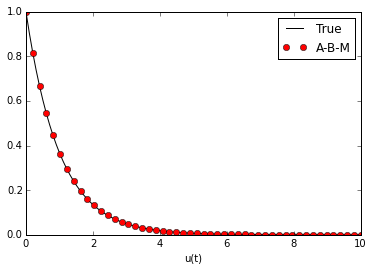

In [12]:
# Implement the Adams-Bashforth-Moulton 2nd order predictor-corrector method
f = lambda t, u: -u

t_exact = numpy.linspace(0.0, 10.0, 100)
u_exact = numpy.exp(-t_exact)

N = 50
t = numpy.linspace(0, 10.0, N)
delta_t = t[1] - t[0]
u_abm2 = numpy.empty(t.shape)


# Use RK-2 to start the method
u_abm2[0] = 1.0
u_abm2[1] = u_abm2[0] + 0.5 * delta_t * f(t_n, u_abm2[0])
u_abm2[1] = u_abm2[0] + delta_t * f(t_n, u_abm2[1])
for n in xrange(len(t) - 1):
    u_abm2[n+1] = u_abm2[n] + delta_t * f(t[n], u_abm2[n])
    u_abm2[n+1] = u_abm2[n] + 0.5 * delta_t * (f(t[n], u_abm2[n]) + f(t[n+1], u_abm2[n+1]))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t_exact, u_exact, 'k', label="True")
axes.plot(t, u_abm2, 'ro', label="A-B-M")

axes.set_xlabel("t")
axes.set_xlabel("u(t)")
axes.legend(loc=1)

plt.show()